# **DATASET 4 Classification**

**Bank Marketing Dataset**

   The data is related with direct marketing campaigns of a Portuguese banking institution.
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,
   in order to access if the product (bank term deposit) would be (or not) subscribed.
   The classification goal is to predict if the client will subscribe a term deposit (variable y).

**Soal**
1.   (poin 10) Tentukan task data mining yang akan dilakukan (klasifikasi/klastering), dan berikan alasan memilih task tersebut.
2.   (poin 20) Pastikan data berkualitas. Jika perlu EDA, maka tampilkan hasil
     EDA dan berikan penjelasan. Jika perlu dilakukan praproses lebih lanjut, silahkan lakukan praproses.
3.   (poin 15) Lakukan klasifikasi/klastering dengan berbagai macam algoritma,
     jumlah algoritma tidak dibatasi, jelaskan alasan pemilihan algoritma tersebut.   
4.   (poin 20) Kembangkan berbagai macam skenario yang mungkin dilakukan.
5.   (poin 15) Evaluasi skenario dari berbagai skenario model yang telah
     dikembangkan, pilih satu skenario yang akan dideploy leih lanjut dan uraikan alasan terkait pemilihan model.
6.   (poin 20) Rekam script ketika dijalankan dan beri penjelasan yang memadai
     untuk menjawab pertanyaan nomor 1-5.


In [595]:
npm = 171
mod = 4
result = npm % mod
print(result)

3


# **DATA UNDERSTANDING**

1. Importing necessary library

2. Importing dataset from local runtime

3. Analyzing the dataset attributes/dimensions and objects

4. Handling missing value

**1. Importing Necessary Library**

In [596]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc,  precision_score, recall_score, f1_score

**2. Importing Dataset from Local Runtime**

In [597]:
url = "/content/Bank Marketing.csv"
data = pd.read_csv(url)

**3. Analyzing the Dataset Attributes/Dimensions and Objects**

In [598]:
data.head()

,clientID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [599]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45573 entries, 0 to 45572
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   clientID   45573 non-null  int64  
 1   age        45541 non-null  float64
 2   job        45573 non-null  object 
 3   marital    45341 non-null  object 
 4   education  45573 non-null  object 
 5   default    45573 non-null  object 
 6   balance    45573 non-null  int64  
 7   housing    45573 non-null  object 
 8   loan       45573 non-null  object 
 9   contact    45469 non-null  object 
 10  day        45573 non-null  int64  
 11  month      45573 non-null  object 
 12  duration   45573 non-null  int64  
 13  campaign   45573 non-null  int64  
 14  pdays      45573 non-null  int64  
 15  previous   45573 non-null  int64  
 16  poutcome   45573 non-null  object 
 17  y          45573 non-null  object 
dtypes: float64(1), int64(7), object(10)
memory usage: 6.3+ MB


In [600]:
data.describe()

,clientID,age,balance,day,duration,campaign,pdays,previous
count,45573.000000,45541.000000,45573.000000,45573.000000,45573.000000,45573.000000,45573.000000,45573.000000
mean,22621.381827,40.770558,1367.410704,15.749808,258.018256,2.763829,39.980208,0.577667
std,13025.955070,10.948596,3066.459236,8.316331,257.813447,3.089919,99.863612,2.297301
min,1.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11394.000000,33.000000,73.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22504.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33897.000000,48.000000,1431.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [601]:
data.isnull().sum()

,0
clientID,0
age,32
job,0
marital,232
education,0
default,0
balance,0
housing,0
loan,0
contact,104


**4. Handling Missing Value**

In [602]:
data.drop(['clientID'], inplace=True, axis=1)
data['age'].fillna(data['age'].mean(), inplace=True)
data['marital'].fillna(data['marital'].mode()[0], inplace=True)
data['contact'].fillna(data['contact'].mode()[0], inplace=True)

<ipython-input-602-d370480ff22f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)
<ipython-input-602-d370480ff22f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [603]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [604]:
data.value_counts()

age   job         marital   education  default  balance  housing  loan  contact    day  month  duration  campaign  pdays  previous  poutcome  y  
46.0  services    married   secondary  no       678      no       no    cellular   7    aug    96        3         -1     0         unknown   no     2
40.0  technician  married   tertiary   no       162      no       no    cellular   7    aug    256       3         -1     0         unknown   no     2
67.0  management  divorced  tertiary   no       361      no       no    cellular   13   oct    411       2         -1     0         unknown   yes    2
30.0  services    single    tertiary   no       1785     no       no    cellular   8    aug    108       2         -1     0         unknown   no     2
31.0  technician  married   secondary  no       172      no       no    cellular   8    aug    151       2         -1     0         unknown   no     2
                                                                                                                                                    ..
34.0  technician  single    tertiary   yes      33       yes      yes   unknown    9    may    244       1         -1     0         unknown   no     1
                            unknown    no       4223     no       yes   cellular   20   nov    133       1         -1     0         unknown   no     1
      unemployed  divorced  secondary  no       354      yes      no    unknown    9    may    308       1         -1     0         unknown   no     1
                            tertiary   no       182      yes      no    cellular   2    feb    170       1         -1     0         unknown   no     1
95.0  retired     married   secondary  no       0        no       no    telephone  1    oct    215       1         -1     0         unknown   no     1
Name: count, Length: 45211, dtype: int64

# **DATA PREPARATION**

1. Data Encoding

2. Feature Selection using Correlation

**1. Data Encoding**

In [605]:
month_map = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12
}

data['month'] = data['month'].map(month_map)
data['y'] = data['y'].map({'yes': 1, 'no': 0})

In [606]:
ordinal_cols = ['job', 'education', 'marital', 'contact', 'poutcome', 'housing', 'loan', 'default']
encoder = OrdinalEncoder()
data[ordinal_cols] = encoder.fit_transform(data[ordinal_cols])

In [607]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,5,261,1,-1,0,3.0,0
1,44.0,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,5,151,1,-1,0,3.0,0
2,33.0,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,5,76,1,-1,0,3.0,0
3,47.0,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,5,92,1,-1,0,3.0,0
4,33.0,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,5,198,1,-1,0,3.0,0


**2. Feature Selection using Correlation**

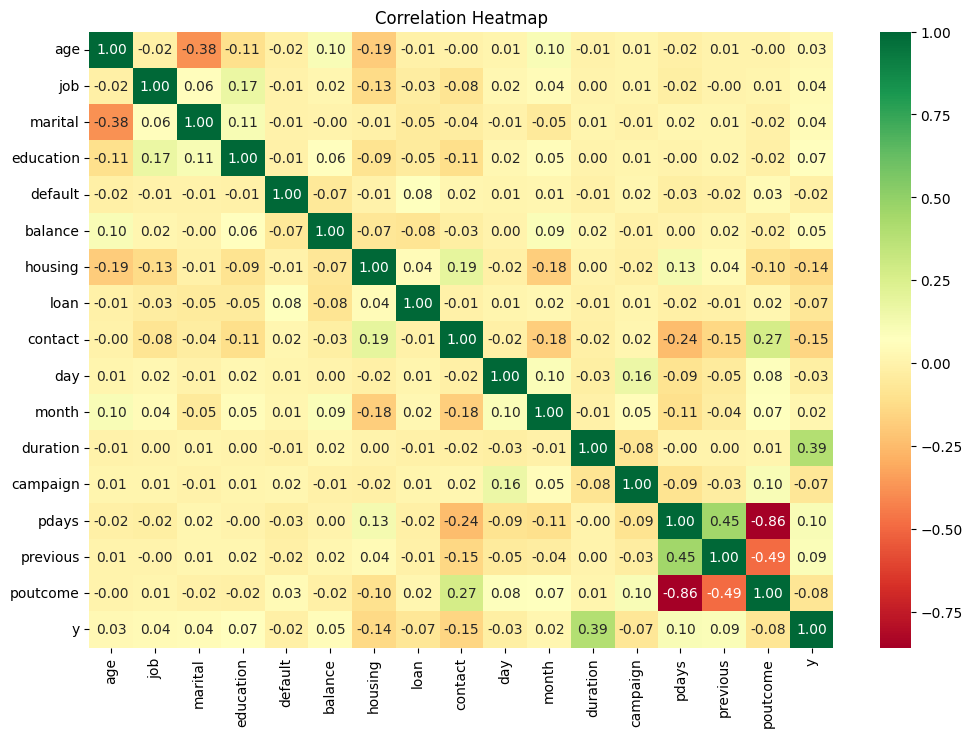

In [608]:
def plot_correlation_heatmap(data):
    numerical_data = data.select_dtypes(include=['float64', 'int64', 'bool'])

    correlation = numerical_data.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn", fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
plot_correlation_heatmap(data)

In [609]:
selected_features = ['duration', 'pdays', 'poutcome', 'previous', 'balance', 'campaign', 'age', 'job', 'education', 'housing']

X = data[selected_features]
y = data['y']

# **CLASSIFICATION**

1. Build and Train Classification Model Using RandomForest, KNN, and Naive Bayes

2. Show Test Classification Model Accuracy

**1. Build and Train Classification Model Using RandomForest, KNN, and Naive Bayes**

In [610]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [611]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

RANDOM FORREST

In [612]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=27)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

K-NEAREST NEIGHBORS

In [613]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

NAIVE BAYES

In [614]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

**2. Show Test Classification Model Accuracy**

In [615]:
print("Random Forest Classifier Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nK-Nearest Neighbors Classifier Results:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

print("\nNaive Bayes Classifier Results:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12082
           1       0.61      0.37      0.46      1590

    accuracy                           0.90     13672
   macro avg       0.76      0.67      0.70     13672
weighted avg       0.89      0.90      0.89     13672

Accuracy: 0.8990637799882972

K-Nearest Neighbors Classifier Results:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     12082
           1       0.55      0.34      0.42      1590

    accuracy                           0.89     13672
   macro avg       0.73      0.65      0.68     13672
weighted avg       0.87      0.89      0.88     13672

Accuracy: 0.8905061439438268

Naive Bayes Classifier Results:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     12082
           1       0.44      0.37      0.41      1590

    accuracy    

# **EVALUATION**

1. Metric Visualitation Evaluation using Confusion Matrix

2. Metric Visualitation Evaluation using ROC - AUC

**1. Metric Visualitation Evaluation using Confusion Matrix


In [616]:
def plot_confusion_matrix(y_test, y_pred, title):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

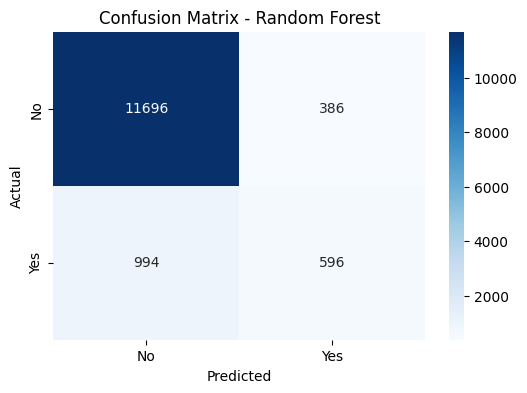

In [617]:
y_pred_rf = rf_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')

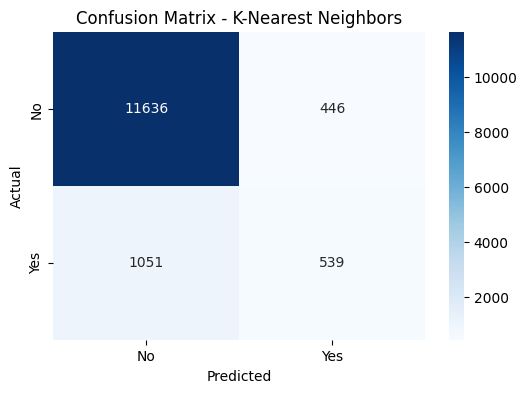

In [618]:
y_pred_knn = knn_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_knn, 'K-Nearest Neighbors')

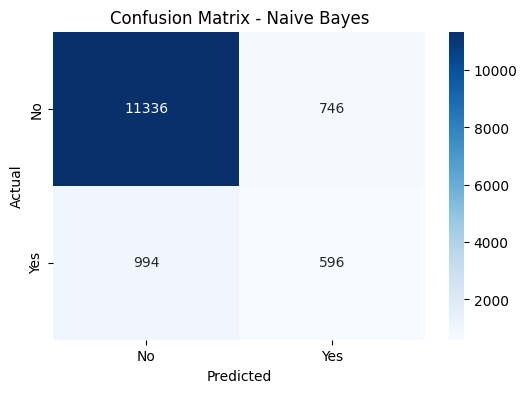

In [619]:
y_pred_nb = nb_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes')

**2. Metric Visualitation Evaluation using ROC - AUC**

Random Forest Metrics:
Accuracy: 0.8991
Precision: 0.6069
Recall: 0.3748
F1-Score: 0.4635

K-Nearest Neighbors Metrics:
Accuracy: 0.8905
Precision: 0.5472
Recall: 0.3390
F1-Score: 0.4186

Naive Bayes Metrics:
Accuracy: 0.8727
Precision: 0.4441
Recall: 0.3748
F1-Score: 0.4065



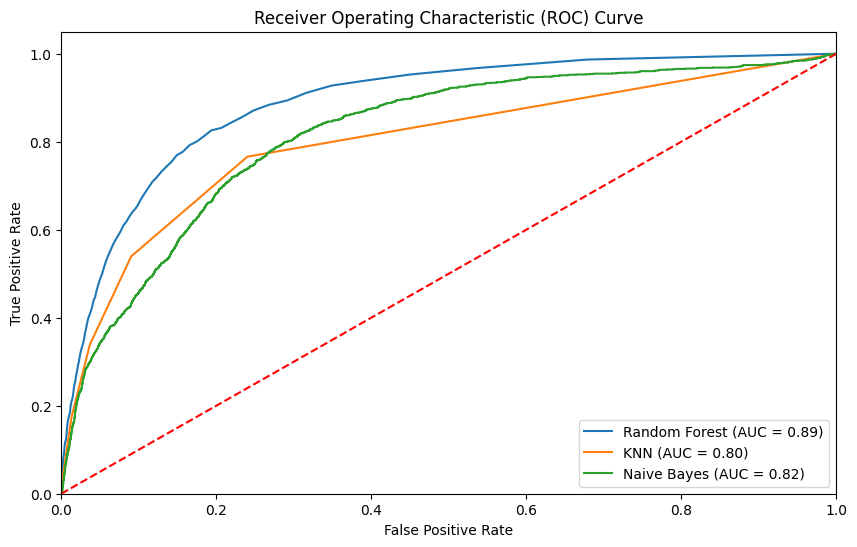

In [620]:
def evaluate_models(rf_model, knn_model, nb_model, X_test, y_test):
    rf_probs = rf_model.predict_proba(X_test)[:, 1]
    rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
    rf_auc = auc(rf_fpr, rf_tpr)
    rf_pred = rf_model.predict(X_test)

    print("Random Forest Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
    print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
    print(f"Recall: {recall_score(y_test, rf_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, rf_pred):.4f}\n")

    knn_probs = knn_model.predict_proba(X_test)[:, 1]
    knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
    knn_auc = auc(knn_fpr, knn_tpr)
    knn_pred = knn_model.predict(X_test)

    print("K-Nearest Neighbors Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, knn_pred):.4f}")
    print(f"Precision: {precision_score(y_test, knn_pred):.4f}")
    print(f"Recall: {recall_score(y_test, knn_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, knn_pred):.4f}\n")

    nb_probs = nb_model.predict_proba(X_test)[:, 1]
    nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
    nb_auc = auc(nb_fpr, nb_tpr)
    nb_pred = nb_model.predict(X_test)

    print("Naive Bayes Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, nb_pred):.4f}")
    print(f"Precision: {precision_score(y_test, nb_pred):.4f}")
    print(f"Recall: {recall_score(y_test, nb_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, nb_pred):.4f}\n")

    plt.figure(figsize=(10, 6))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_auc)
    plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = %0.2f)' % knn_auc)
    plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = %0.2f)' % nb_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

evaluate_models(rf_model, knn_model, nb_model, X_test, y_test)